# Projeto Final

## Analisando Fluxo de Transito

Todos nós sabemos dos problemas relacionados ao transito de recife. Para identificar o volume de transito tomou como base os dados relacionados a foto sensores.

Dados de Equipament: http://dados.recife.pe.gov.br/dataset/velocidade-das-vias-quantitativo-por-velocidade-media-2020/resource/94c283c0-cbfb-4540-9589-e62cd6ca039a
<p><b>Nome do Arquivo: </b>lombadas-fotossensores.csv</p>

Dados Fluxo de Lombadas: http://dados.recife.pe.gov.br/dataset/velocidade-das-vias-quantitativo-por-velocidade-media-2020/resource/870d90a3-6559-4374-b798-be57a29d3d85
<p><b>Nome do Arquivo: </b>870d90a3-6559-4374-b798-be57a29d3d85.csv</p>

Dados Fluxo de Fotosenssores: http://dados.recife.pe.gov.br/dataset/velocidade-das-vias-quantitativo-por-velocidade-media-2020/resource/7bf5f821-4ec4-47f4-b8ba-c1ab6a1cec3d
<p><b>Nome do Arquivo: </b>57439713-9d98-49b9-a985-e934debf2195.csv</p>

Dados relacionados a Area urbana: http://dados.recife.pe.gov.br/dataset/area-urbana/resource/a642296d-1405-4918-87db-4ce88ba182f5?inner_span=True
<p><b>Nome do Arquivo: </b>trechoslogradouro.csv</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
#!git clone https://github.com/sauloemp/WebStreetPE.git

## Dados de Equipamentos

In [3]:
dfLobadas = pd.read_csv("Dados/Dados Abertos/lombadas-fotossensores.csv", sep = ";")
dfLobadas.head()

equipamento     tipo                                         logradouro  \
0        5941  Lombada  AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...   
1        5942  Lombada  AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...   
2        5943  Lombada                   AV. BOA VIAGEM - TERCEIRO JARDIM   
3        5944  Lombada  DEFRONTE A PCA. GOV. PAULO GUERRA, CABANGA - S...   
4        5945  Lombada  APOS PONTE AGAMENON MAGALHAES, CABANGA - SENT....   

  velocidade_via  latitude  longitude  
0        60 km/h -8.130970 -34.916161  
1        60 km/h -8.130647 -34.915886  
2        60 km/h -8.107843 -34.888161  
3        60 km/h -8.080121 -34.892187  
4        60 km/h -8.080820 -34.891159

## Trabalhando Dados de Fluxo Fotosensores

In [4]:
dfFluxoFotosensores = pd.read_csv(r"Dados/Dados Abertos/57439713-9d98-49b9-a985-e934debf2195.csv", sep = ",")
dfFluxoFotosensores.head()

_id  mes equipamento  faixa                 data  hora minutos_intervalo  \
0    1   12    FS002REC      1  2020-12-01T00:00:00     1              0-15   
1    2   12    FS002REC      1  2020-12-01T00:00:00     1             31-45   
2    3   12    FS002REC      1  2020-12-01T00:00:00     1             46-59   
3    4   12    FS002REC      1  2020-12-01T00:00:00     2             16-30   
4    5   12    FS002REC      1  2020-12-01T00:00:00     2             46-59   

   qtd_0a10km  qtd_11a20km  qtd_21a30km  qtd_31a40km  qtd_41a50km  \
0           1            1            0            0            0   
1           1            0            0            0            0   
2           0            2            1            0            0   
3           0            0            1            1            0   
4           2            1            0            0            0   

   qtd_51a60km  qtd_61a70km  qtd_71a80km  qtd_81a90km  qtd_91a100km  \
0            0            0            0            0             0   
1            0            0            0            0             0   
2            0            0            0            0             0   
3            0            0            0            0             0   
4            0            0            0            0             0   

   qtd_acimade100km  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [5]:
dfFluxoFotosensores['equipamento'].unique()

array(['FS002REC', 'FS003REC', 'FS004REC', 'FS006REC', 'FS009REC',
       'FS010REC', 'FS012REC', 'FS014REC', 'FS018REC', 'FS020REC',
       'FS021REC', 'FS022REC', 'FS023REC', 'FS024REC', 'FS025REC',
       'FS026REC', 'FS027REC', 'FS028REC', 'FS029REC', 'FS030REC',
       'FS033REC', 'FS037REC'], dtype=object)

In [6]:
dfFluxoFotosensores.iloc[:,7:].sum(axis=1)

0          2
1          1
2          3
3          2
4          3
          ..
152253    12
152254     6
152255     1
152256     6
152257     3
Length: 152258, dtype: int64

In [7]:
dfFotossensoresBase = dfFluxoFotosensores.iloc[:,:7]
dfFotossensoresSomatorio = dfFluxoFotosensores.iloc[:,7:].sum(axis=1)
dfFotossensoresBase['Fluxo'] = dfFotossensoresSomatorio
dfFotossensoresBase.head()

_id  mes equipamento  faixa                 data  hora minutos_intervalo  \
0    1   12    FS002REC      1  2020-12-01T00:00:00     1              0-15   
1    2   12    FS002REC      1  2020-12-01T00:00:00     1             31-45   
2    3   12    FS002REC      1  2020-12-01T00:00:00     1             46-59   
3    4   12    FS002REC      1  2020-12-01T00:00:00     2             16-30   
4    5   12    FS002REC      1  2020-12-01T00:00:00     2             46-59   

   Fluxo  
0      2  
1      1  
2      3  
3      2  
4      3

In [8]:
dfFotossensoresBase.drop(columns=['_id','faixa','mes', 'minutos_intervalo','hora','data'], inplace= True)

# Dados Relacionados A Lombada Eletronica

In [9]:
dfFluxoLombadaEletro = pd.read_csv(r"Dados/Dados Abertos/870d90a3-6559-4374-b798-be57a29d3d85.csv", sep = ",")
dfFluxoLombadaEletro.head()

_id   ano  mes  equipamento  faixa                 data  hora  \
0    1  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   
1    2  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   
2    3  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   
3    4  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   
4    5  2020   12       5941.0    1.0  2020-12-01T00:00:00  10.0   

  minutos_intervalo  qtd_0a10km  qtd_11a20km  qtd_21a30km  qtd_31a40km  \
0       00:00-00:15         0.0          0.0          0.0          0.0   
1       00:15-00:30         0.0          0.0          0.0          2.0   
2       00:30-00:45         0.0          0.0          0.0          1.0   
3       00:45-01:00         0.0          0.0          1.0          0.0   
4       10:00-10:15         0.0          0.0          7.0         28.0   

   qtd_41a50km  qtd_51a60km  qtd_61a70km  qtd_71a80km  qtd_81a90km  \
0         11.0          4.0          2.0          1.0          0.0   
1          5.0         10.0          0.0          1.0          0.0   
2          8.0          3.0          3.0          0.0          0.0   
3          5.0          2.0          0.0          0.0          0.0   
4        121.0         26.0          1.0          0.0          0.0   

   qtd_91a100km  qtd_acimade100km  
0           1.0               0.0  
1           1.0               0.0  
2           0.0               0.0  
3           0.0               0.0  
4           0.0               0.0

In [10]:
dfFluxoLombadaEletro.iloc[:,8:].sum(axis=1)

0          19.0
1          19.0
2          15.0
3           8.0
4         183.0
          ...  
165075     78.0
165076     95.0
165077    100.0
165078     96.0
165079      0.0
Length: 165080, dtype: float64

In [11]:
dfLombEletBase = dfFluxoLombadaEletro.iloc[:,:7]
dfLombEletSomatorio = dfFluxoLombadaEletro.iloc[:,7:].sum(axis=1)
dfLombEletBase['Fluxo'] = dfLombEletSomatorio
dfLombEletBase.head()

_id   ano  mes  equipamento  faixa                 data  hora  Fluxo
0    1  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   19.0
1    2  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   19.0
2    3  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0   15.0
3    4  2020   12       5941.0    1.0  2020-12-01T00:00:00   0.0    8.0
4    5  2020   12       5941.0    1.0  2020-12-01T00:00:00  10.0  183.0

In [12]:
dfLombEletBase.drop(columns=['_id','ano','mes', 'faixa','hora','data'], inplace= True)

In [13]:
dfLombEletBase = dfLombEletBase.groupby(["equipamento"]).sum("Fluxo")

# União de dados de Fotosensores e Lombada Eletronica

In [14]:
dfLombEletBase

Fluxo
equipamento           
5941.0        931074.0
5942.0        921182.0
5943.0         74554.0
5944.0        736872.0
5945.0       1014432.0
5946.0        540866.0
5947.0        234441.0
5948.0        719832.0
5949.0        358495.0
5950.0       1229216.0
5951.0        511543.0
5952.0        385460.0
5953.0        506259.0
5954.0        474911.0
5955.0        315298.0
5956.0        390658.0
5957.0        197008.0
5958.0        536576.0
5959.0        468400.0
5960.0        417769.0
5961.0        721838.0
5962.0        446339.0
5963.0        914697.0
5964.0        705596.0
5965.0        851584.0
5966.0        700403.0
5967.0        427135.0
5968.0        495262.0
5969.0        582950.0
5970.0        600983.0
5971.0        635166.0
5972.0        279190.0

In [15]:
dfFotossensoresBase

equipamento  Fluxo
0         FS002REC      2
1         FS002REC      1
2         FS002REC      3
3         FS002REC      2
4         FS002REC      3
...            ...    ...
152253    FS037REC     12
152254    FS037REC      6
152255    FS037REC      1
152256    FS037REC      6
152257    FS037REC      3

[152258 rows x 2 columns]

In [16]:
dfFotossensoresBase = dfFotossensoresBase.groupby(by=['equipamento']).sum('Fluxo').reset_index()
dfLombEletBase = dfLombEletBase.groupby(by=['equipamento']).sum('Fluxo').reset_index()

In [17]:
#Limpando Dados dos Fotosensores
dfFotossensoresBase['codFotoSensor'] = dfFotossensoresBase['equipamento'].str.split("REC", expand=False)
dfFotossensoresBase['codFotoSensor'] = dfFotossensoresBase['equipamento'].str.split("REC", expand=True)

In [18]:
#Limpando Dados dos Lombada Eletronica
#Limpando Dados das Lombadas
dfLombEletBase["equipamento"] = dfLombEletBase["equipamento"].astype(str)

dfLombEletBase['codFotoSensor'] = dfLombEletBase["equipamento"].str.split(".").str[0]

In [19]:
dfConcat = pd.concat([dfLombEletBase, dfFotossensoresBase])
dfMergeSensorEquip = pd.merge(dfConcat,dfLobadas, left_on='codFotoSensor',right_on='equipamento')

In [20]:
dfMergeSensorEquip.sort_values('Fluxo',inplace=True)

In [21]:
dfMergeSensorEquip.reset_index(drop=True)

equipamento_x      Fluxo codFotoSensor equipamento_y         tipo  \
0       FS018REC    30677.0         FS018         FS018  Fotossensor   
1       FS003REC    43147.0         FS003         FS003  Fotossensor   
2         5943.0    74554.0          5943          5943      Lombada   
3       FS009REC    97590.0         FS009         FS009  Fotossensor   
4       FS030REC   114229.0         FS030         FS030  Fotossensor   
5       FS024REC   137425.0         FS024         FS024  Fotossensor   
6       FS002REC   184834.0         FS002         FS002  Fotossensor   
7         5957.0   197008.0          5957          5957      Lombada   
8       FS025REC   201263.0         FS025         FS025  Fotossensor   
9       FS029REC   232432.0         FS029         FS029  Fotossensor   
10        5947.0   234441.0          5947          5947      Lombada   
11      FS033REC   271431.0         FS033         FS033  Fotossensor   
12        5972.0   279190.0          5972          5972      Lombada   
13        5955.0   315298.0          5955          5955      Lombada   
14      FS020REC   316038.0         FS020         FS020  Fotossensor   
15      FS028REC   316873.0         FS028         FS028  Fotossensor   
16      FS027REC   353756.0         FS027         FS027  Fotossensor   
17        5949.0   358495.0          5949          5949      Lombada   
18      FS026REC   371691.0         FS026         FS026  Fotossensor   
19      FS023REC   383498.0         FS023         FS023  Fotossensor   
20        5952.0   385460.0          5952          5952      Lombada   
21        5956.0   390658.0          5956          5956      Lombada   
22        5960.0   417769.0          5960          5960      Lombada   
23        5967.0   427135.0          5967          5967      Lombada   
24        5962.0   446339.0          5962          5962      Lombada   
25        5959.0   468400.0          5959          5959      Lombada   
26        5954.0   474911.0          5954          5954      Lombada   
27        5968.0   495262.0          5968          5968      Lombada   
28        5953.0   506259.0          5953          5953      Lombada   
29        5951.0   511543.0          5951          5951      Lombada   
30        5958.0   536576.0          5958          5958      Lombada   
31        5946.0   540866.0          5946          5946      Lombada   
32      FS022REC   546127.0         FS022         FS022  Fotossensor   
33        5969.0   582950.0          5969          5969      Lombada   
34      FS010REC   587618.0         FS010         FS010  Fotossensor   
35        5970.0   600983.0          5970          5970      Lombada   
36        5971.0   635166.0          5971          5971      Lombada   
37      FS014REC   665185.0         FS014         FS014  Fotossensor   
38        5966.0   700403.0          5966          5966      Lombada   
39        5964.0   705596.0          5964          5964      Lombada   
40        5948.0   719832.0          5948          5948      Lombada   
41        5961.0   721838.0          5961          5961      Lombada   
42      FS021REC   729086.0         FS021         FS021  Fotossensor   
43        5944.0   736872.0          5944          5944      Lombada   
44        5965.0   851584.0          5965          5965      Lombada   
45        5963.0   914697.0          5963          5963      Lombada   
46        5942.0   921182.0          5942          5942      Lombada   
47        5941.0   931074.0          5941          5941      Lombada   
48      FS004REC   983338.0         FS004         FS004  Fotossensor   
49      FS037REC   996178.0         FS037         FS037  Fotossensor   
50        5945.0  1014432.0          5945          5945      Lombada   
51      FS012REC  1078051.0         FS012         FS012  Fotossensor   
52      FS006REC  1122759.0         FS006         FS006  Fotossensor   
53        5950.0  1229216.0          5950          5950      Lombada   

                                          

In [22]:
dfMergeSensorEquip['tipo'].value_counts()

Lombada        32
Fotossensor    22
Name: tipo, dtype: int64

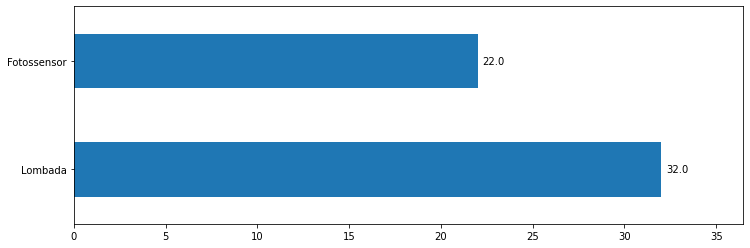

In [23]:
# Bring some raw data.
frequencies = dfMergeSensorEquip['tipo'].value_counts()

freq_series = pd.Series(frequencies)

y_labels = dfMergeSensorEquip['tipo'].value_counts().index

# Plot the figure.
plt.figure(figsize=(12, 4))
ax = freq_series.plot(kind='barh')
#ax.set_title('Quantidade Total de Sensores')
#ax.set_xlabel('Quantidade de Sensores')
#ax.set_ylabel('Sensores')
ax.set_yticklabels(y_labels)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
plt.margins(0.14)

In [24]:
t = sum(dfMergeSensorEquip["Fluxo"])
print(sum(dfMergeSensorEquip["Fluxo"].reset_index(drop=True)/t))

1.0


# Coletando Endereços

In [25]:
for index, row in dfMergeSensorEquip.iterrows():
  print(row["latitude"], row["longitude"])

-8.0277621 -34.928001
-8.0635787 -34.873533
-8.1078431 -34.8881609
-8.061165 -34.8832943
-8.0811109 -34.9683544
-8.05216 -34.90217
-8.0634002 -34.8736694
-8.127873 -34.900242
-8.1215132 -34.9093425
-8.0920388 -34.9614941
-8.1410665 -34.9032775
-8.08463 -34.92803
-8.032786 -34.902984
-8.0874203 -34.9099345
-8.0278685 -34.8929091
-8.1362834 -34.9035808
-8.1362834 -34.9035808
-8.0431659 -34.8858642
-8.1214297 -34.9098383
-8.0182744 -34.9283043
-8.0395243 -34.9576449
-8.1029992 -34.91313
-8.0758569 -34.8874512
-8.0795908 -34.8927989
-8.1157038 -34.904305
-8.0883266 -34.8837708
-8.0637868 -34.8716323
-8.116378 -34.904458
-8.0391921 -34.9298387
-8.0674689 -34.9278105
-8.0411575 -34.9033434
-8.1410665 -34.9032775
-8.05538 -34.90906
-8.062406 -34.917518
-8.0626244 -34.8973606
-8.012909 -34.88938
-8.011664 -34.889419
-8.0919008 -34.8820881
-8.1057941 -34.8920917
-8.0989628 -34.8902929
-8.0431659 -34.8858642
-8.0717339 -34.8779064
-8.06242 -34.91688
-8.0801208 -34.8921866
-8.1053608 -34.8918783


In [26]:
dfMergeSensorEquip["latitude"][0]

-8.1309702

In [27]:
from geopy.geocoders import Nominatim

In [35]:
listEnd = []

for index, row in dfMergeSensorEquip.iterrows():
    Neighbor = Nominatim(user_agent="Intro Geocode").reverse(str(row["latitude"]) + ", " + str(row["longitude"]))[0]
    listEnd.append(Neighbor)
    print(Neighbor, '\n')

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=-8.0277621&lon=-34.928001&format=json&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [28]:
Bairros = ["Monteiro" ,"Bairro do Recife" ,"Boa Viagem" ,"Boa Vista"
           ,"Totó","Graças","Bairro do Recife","Boa Viagem","Imbiribeira"
           ,"Tejipió","Boa Viagem","Jiquiá","Tamarineira","Imbiribeira"
           ,"Beberibe","Boa Viagem","Boa Viagem","Boa Vista","Imbiribeira"
           ,"Macaxeira","Várzea","Imbiribeira","São José","Cabanga"
           ,"Boa Viagem","Pina","Bairro do Recife","Boa Viagem","Iputinga"
           ,"San Martim","Graças","Boa viagem","Sítio do Berardo","Prado"
           ,"Paissandu","Beberibe","Fundão","Pina","Pina","Pina","Vila Rua Berlim"
           ,"São José","Prado","Cabanga","Pina","Torre","Boa Viagem","Ibura"
           ,"Pina","Paissandu","Cabanga","Boa Vista","Boa Viagem","Vila Campo da Vila"]
dfMergeSensorEquip["Bairros"] = Bairros
dfMergeSensorEquip["Ruas"] = listEnd

In [29]:
dfMergeSensorEquip.query("Bairros in ('Boa Viagem')")

equipamento_x      Fluxo codFotoSensor equipamento_y         tipo  \
2         5943.0    74554.0          5943          5943      Lombada   
16        5957.0   197008.0          5957          5957      Lombada   
6         5947.0   234441.0          5947          5947      Lombada   
49      FS028REC   316873.0         FS028         FS028  Fotossensor   
48      FS027REC   353756.0         FS027         FS027  Fotossensor   
21        5962.0   446339.0          5962          5962      Lombada   
27        5968.0   495262.0          5968          5968      Lombada   
1         5942.0   921182.0          5942          5942      Lombada   
35      FS006REC  1122759.0         FS006         FS006  Fotossensor   

                                           logradouro velocidade_via  \
2                    AV. BOA VIAGEM - TERCEIRO JARDIM        60 km/h   
16                          AV. CONS. AGUIAR, N. 4620        60 km/h   
6        AV. BOA VIAGEM – EM FRENTE PARQUE DONA LINDU        60 km/h   
49         RUA VISCONDE DE JEQUITINHONHA,SEMAFORO 158        60 Km/h   
48         RUA VISCONDE DE JEQUITINHONHA,SEMAFORO 158        60 Km/h   
21  AV. DOM JOAO VI, EM FRT. AO PT. DE ONIBUS N. 0...        50 km/h   
27  AV. DOM JOAO VI, ENTRE OS N. 777 E 835 - SENT....        50 km/h   
1   AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AERO...        60 km/h   
35          AV. ENG. DOMINGOS FERREIRA, SEMAFORO 297.        60 Km/h   

    latitude  longitude     Bairros  \
2  -8.107843 -34.888161  Boa Viagem   
16 -8.127873 -34.900242  Boa Viagem   
6  -8.141067 -34.903278  Boa Viagem   
49 -8.136283 -34.903581  Boa Viagem   
48 -8.136283 -34.903581  Boa Viagem   
21 -8.115704 -34.904305  Boa Viagem   
27 -8.116378 -34.904458  Boa Viagem   
1  -8.130647 -34.915886  Boa Viagem   
35 -8.105267 -34.889605  Boa Viagem   

                                                 Ruas  
2   Radisson Hotel Recife, 1906, Avenida Boa Viage...  
16  4620, Avenida Conselheiro Aguiar, Boa Viagem, ...  
6   Boa Viagem, Recife, Região Geográfica Imediata...  
49  10017, Avenida Visconde de Jequitinhonha, Boa ...  
48  10017, Avenida Visconde de Jequitinhonha, Boa ...  
21  Colégio GGE - Boa Viagem, 20, Rua José da Silv...  
27  Estacionamento Shopping Center Recife, Avenida...  
1   5199, Avenida Marechal Mascarenhas de Moraes, ...  
35  Parada 07, Avenida Engenheiro Domingos Ferreir...

In [30]:
dfMergeSensorEquip[["Bairros","codFotoSensor","tipo","Ruas"]].query("Bairros in ('Boa Viagem', 'Cabanga','Paissandu','Pina','Boa Vista')").sort_values('Bairros').to_excel('Ruas_c.xlsx', encoding='utf8')
dfMergeSensorEquip[["Bairros","codFotoSensor","tipo","Ruas"]].query("Bairros in ('Monteiro', 'Jiquiá','Tamarineira','Totó','Tejipió')").sort_values('Bairros').to_excel('Ruas_b.xlsx', encoding='utf8')

# Trabalhando Visualizações

In [31]:
dfBairro = dfMergeSensorEquip[['Bairros','Fluxo']].groupby('Bairros').sum('Fluxo').reset_index().sort_values('Fluxo')
dfBairro.head()

Bairros     Fluxo
13     Monteiro   30677.0
23         Totó  114229.0
21      Tejipió  232432.0
11       Jiquiá  271431.0
20  Tamarineira  279190.0

In [32]:
dfBairro["Fluxo"]

13      30677.0
23     114229.0
21     232432.0
11     271431.0
20     279190.0
12     383498.0
26     385460.0
10     506259.0
17     511543.0
4      540866.0
19     546127.0
6      635166.0
7      674001.0
0      702892.0
25     719832.0
22     914697.0
1      917021.0
8      931074.0
18    1139607.0
24    1229216.0
9     1278910.0
16    1312036.0
3     1534136.0
14    1583796.0
5     2178439.0
2     4162174.0
15    4374506.0
Name: Fluxo, dtype: float64

In [33]:
dfBairro.query("Bairros in ('Pina','Boa Viagem')")["Fluxo"].sum()

8536680.0

In [34]:
T = sum(dfBairro["Fluxo"])
dfBairro.query("Bairros in ('Pina','Boa Viagem')")["Fluxo"].sum()/T*100

30.391308550274545

In [35]:
pd.options.display.float_format = "{:.2f}".format
dfBairro.describe()

Fluxo
count      27.00
mean  1040341.30
std   1057035.15
min     30677.00
25%    445859.50
50%    702892.00
75%   1254063.00
max   4374506.00

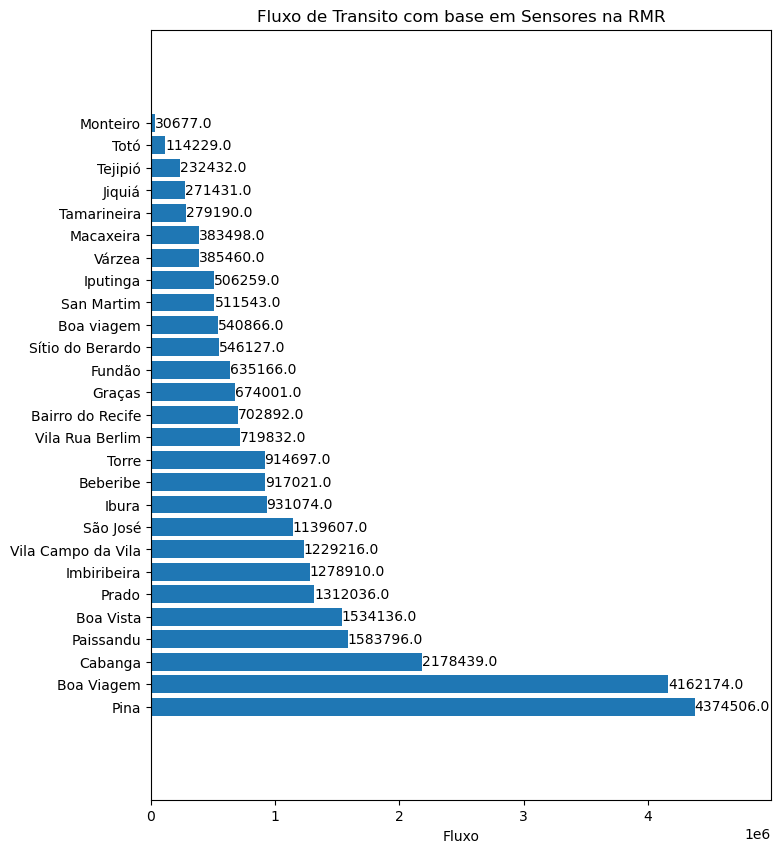

In [36]:

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (8,10))


Bairro = dfBairro["Bairros"]
y_pos = np.arange(len(Bairro))      
performance = dfBairro["Fluxo"]

bars = ax.barh(y_pos, performance)
for bar in bars:
  width = bar.get_width() #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width+2, label_y_pos, s=f'{width}', va='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(Bairro)
ax.invert_yaxis()  # labels read top-to-bottom


ax.set_xlabel('Fluxo')
ax.set_title('Fluxo de Transito com base em Sensores na RMR')


plt.margins(0.14)
plt.show();

No handles with labels found to put in legend.


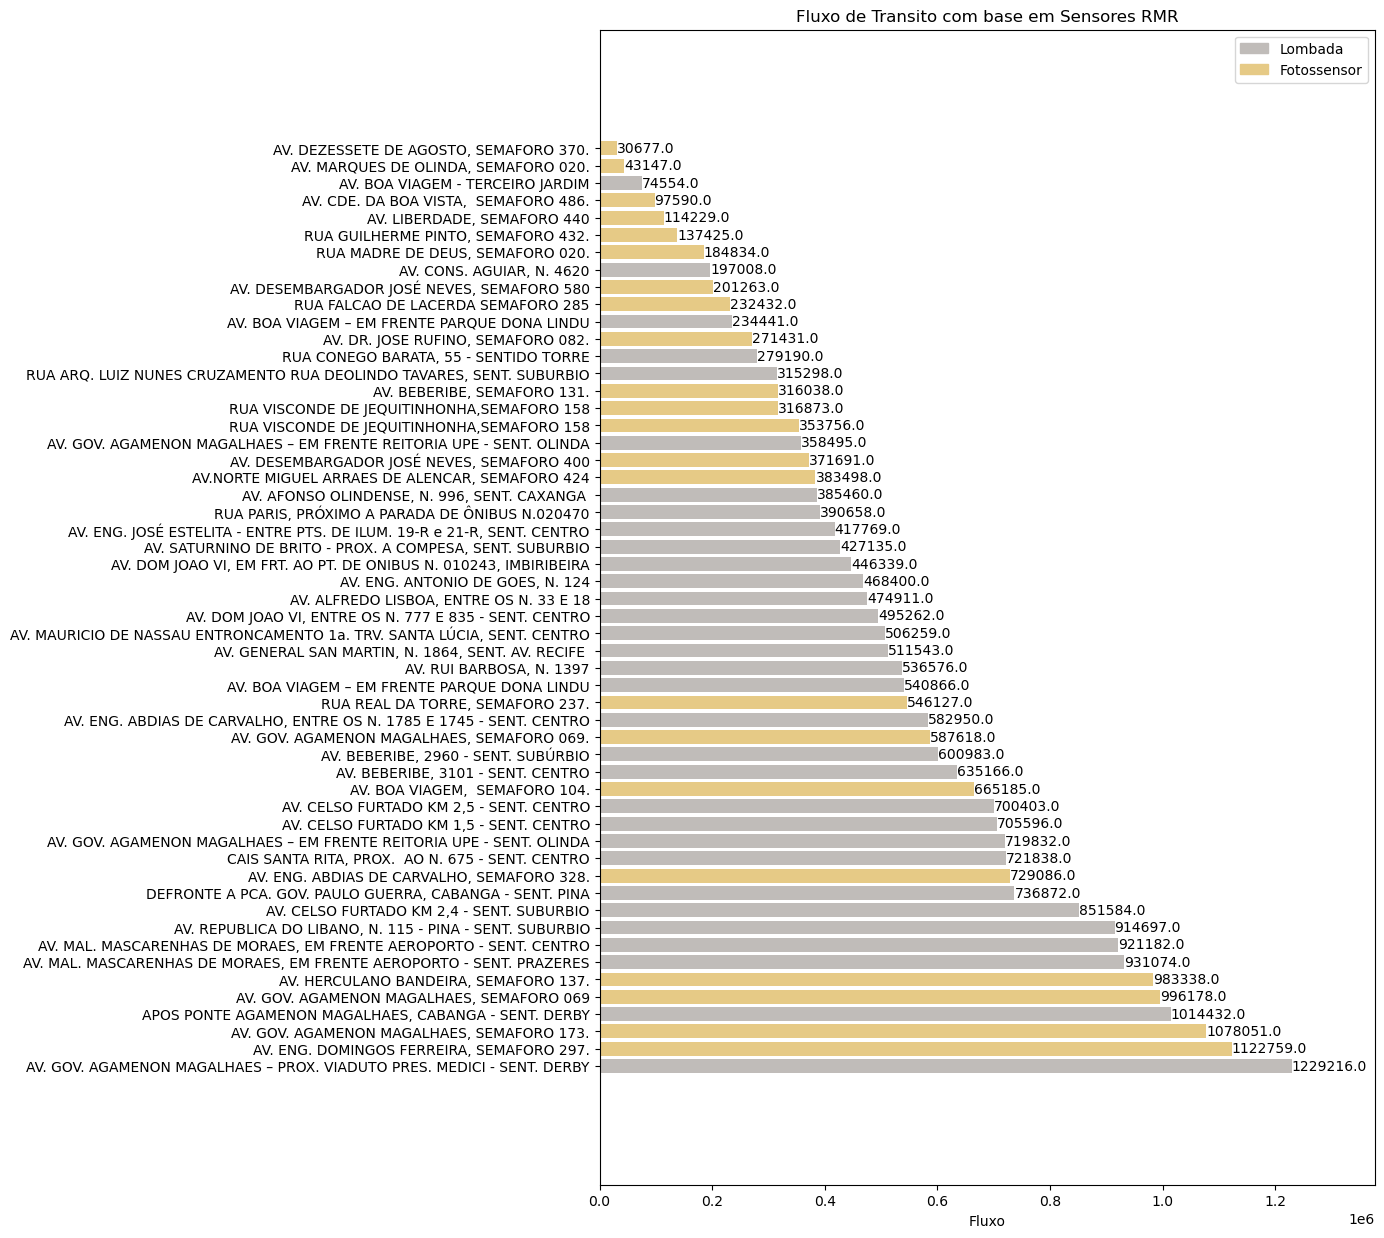

In [37]:
#Visualização de ruas
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (10,15))


Bairro = dfMergeSensorEquip["logradouro"]
y_pos = np.arange(len(Bairro))
performance = dfMergeSensorEquip["Fluxo"]
colors = {"Lombada":"#C0BCB9", "Fotossensor":"#e6ca86"}         
c = dfMergeSensorEquip['tipo'].apply(lambda x: colors[x])
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]




bars = ax.barh(y_pos, performance, align='center', color=c, linewidth = 6)
for bar in bars:
  width = bar.get_width() #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width+2, label_y_pos, s=f'{width}', va='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(Bairro)
ax.invert_yaxis()  # labels read top-to-bottom
ax.legend()

ax.set_xlabel('Fluxo')
ax.set_title('Fluxo de Transito com base em Sensores RMR')


plt.legend(handles, labels)
plt.margins(0.12)
plt.show();

No handles with labels found to put in legend.


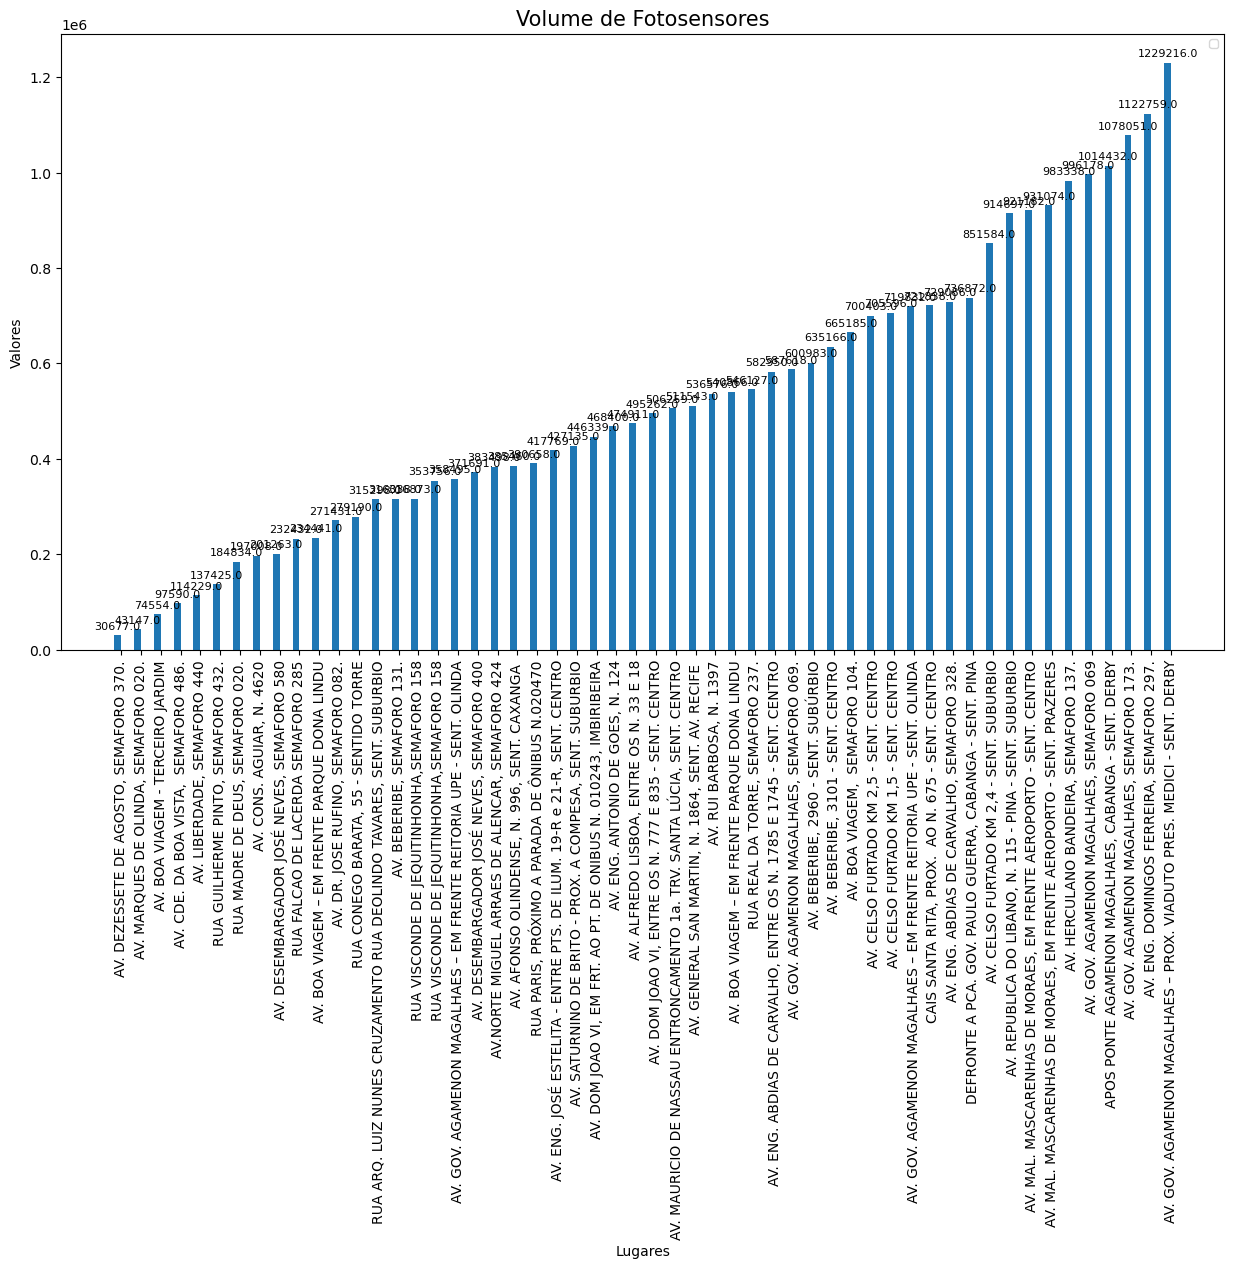

In [38]:
# Parâmetros iniciais

rotulos = dfMergeSensorEquip['logradouro']
x = np.arange(len(rotulos))
width = 0.35 # distanciamento das barras

fig, ax = plt.subplots(figsize=(15, 8))

# gerando dados para gráfico de barras

movie_bar = ax.bar(x - width/2, dfMergeSensorEquip['Fluxo'], width)

# definindo o nome dos eixos e Título

ax.set_xlabel('Lugares')
ax.set_ylabel('Valores')
ax.set_title('Volume de Fotosensores', fontsize = 15)
ax.set_xticks(x)
plt.xticks(rotation = 90) # Rotaciona os rótulos do eixo x em 90o.
ax.set_xticklabels(rotulos)

plt.rcParams.update({'font.size': 8})

# adicionando legenda

ax.legend()

def get_label(qtds):
    for i in qtds:
        altura = i.get_height()
        ax.annotate('{}'.format(altura,), xy=(i.get_x()+ i.get_width()/2, altura),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  
get_label(movie_bar)

## Trabalhando Dados de Trecho

In [39]:
dfTrecho = pd.read_csv(r"Dados/trechoslogradouro.csv", sep = ";")
dfTrecho.head()

codlogradouro nome_logradouro_concatenado nome_oficial_logradouro  \
0           6939               RUA ARACATUBA           Rua Araçatuba   
1           6947                   RUA ARACE               Rua Arace   
2           6955               RUA ARACOIABA           Rua Araçoiaba   
3          10502                 RUA BEATRIZ             Rua Beatriz   
4          10510               RUA BEBEDOURO           Rua Bebedouro   

  nome_logradouro_resumido cod_indica_pavimentacao desc_indica_pavimentacao  \
0             R. Aracatuba                       S          Via Pavimentada   
1                 R. Arace                       S          Via Pavimentada   
2             R. Aracoiaba                       X             Não definida   
3               R. Beatriz                       S          Via Pavimentada   
4             R. Bebedouro                       S          Via Pavimentada   

  indica_corredor_transporte indica_perimetral  codbairro          nomeBairro  
0                        NaN               NaN        213               IPSEP  
1                        NaN               NaN        566     NOVA DESCOBERTA  
2                        NaN               NaN        892             TEJIPIO  
3                        NaN               NaN        337           AGUA FRIA  
4                        NaN               NaN        523  ALTO JOSE DO PINHO

In [40]:
dfTrecho[["nomeBairro",'nome_logradouro_resumido']]

nomeBairro       nome_logradouro_resumido
0                   IPSEP                   R. Aracatuba
1         NOVA DESCOBERTA                       R. Arace
2                 TEJIPIO                   R. Aracoiaba
3               AGUA FRIA                     R. Beatriz
4      ALTO JOSE DO PINHO                   R. Bebedouro
...                   ...                            ...
11916               IBURA   R. Lourival Bandeira de Melo
11917               IBURA        R. José Durval Carneiro
11918               IBURA    R. Dr Achilles Amorim Moura
11919               IBURA    R. Reinaldo Dorneles Camara
11920               BARRO  R. Piloto Nestor Silva Junior

[11921 rows x 2 columns]

## Trabalhando com Grafos

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import networkx as nx

#Minhas funções
def grauMedio(G):
    i = 0
    vetorDeGraus = np.zeros(G.order())
    for no in G.degree():
        vetorDeGraus[i] = no[1]
        i += 1
    grauMedio = np.mean(vetorDeGraus)
    return grauMedio

def entropia(G):
    entropia = 0
    freq = nx.degree_histogram(G)
    for i in range(len(freq)):
        if freq[i] != 0: 
            entropia = entropia - freq[i]*np.log2(freq[i])
    return entropia

In [42]:
G = nx.Graph()

#G = nx.Graph([("R. Cláudio Brotherhood","Rua Áureo Xavier"),("R. Cláudio Brotherhood","R. Euríco de Souza Leão")])
G = nx.Graph([("R. Cláudio Brotherhood","Rua Áureo Xavier")])
G.edges()
#nx.draw_networkx(G)
#plt.show()

EdgeView([('R. Cláudio Brotherhood', 'Rua Áureo Xavier')])

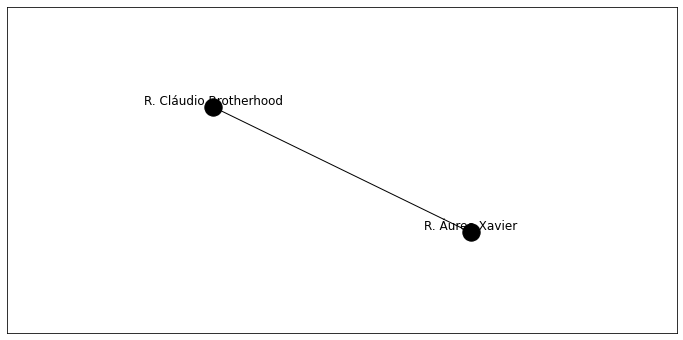

In [43]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}


#G = nx.Graph()

#G = nx.Graph([("R. Cláudio Brotherhood","Rua Áureo Xavier"),("R. Cláudio Brotherhood","R. Euríco de Souza Leão")])
G = nx.Graph([("R. Cláudio Brotherhood","R. Áureo Xavier"), ("R. Áureo Xavier", "R. Cláudio Brotherhood")])

fig, ax = plt.subplots(1,1,figsize=(12,6))
pos = nx.spring_layout(G)
pos_nodes = nudge(pos, 0, 0.1)

#nx.draw_networkx(G,with_labels=True, pos = pos_nodes, node_size=350, node_color='Black' ,ax=ax[0])

nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax, node_color='Black')
nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax)

ax.margins(0.8, 0.8) 
plt.show()

In [44]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}


def plotIndicadoresGrafos(G):
    print('\n\n'+'\033[1m' + 'Indicadores' + '\033[0m')
    print('Densidade: \t\t', nx.density(G))
    print("Coef. Clusterização: \t", nx.average_clustering(G))
    print("Grau médio: \t\t", grauMedio(G))
    print("Entropia: \t\t", entropia(G))
    print("Assortatividade: \t", nx.degree_assortativity_coefficient(G))

    print('\n\033[1m' + 'Graficos' + '\033[0m')
    #Autovalores
    autovalores = nx.laplacian_spectrum(G)
    plt.bar(np.arange(G.order()), autovalores)
    plt.title("Autovalores")
    plt.show()

    #Disrtibuição
    freq = nx.degree_histogram(G)
    plt.title("Distribuição")
    plt.bar(np.arange(len(freq)), freq)
    plt.show()

    #Grafos
    
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    pos = nx.spring_layout(G)
    pos_nodes = nudge(pos, 0, 0.1)

    nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax, node_color='Black')
    nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax)
    ax.margins(0.8, 0.8)

    plt.title("Grafo")

    plt.show()



Indicadores
Densidade: 		 1.0
Coef. Clusterização: 	 0.0
Grau médio: 		 1.0
Entropia: 		 -2.0
Assortatividade: 	 nan

Graficos


D:\ProgramData\Anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


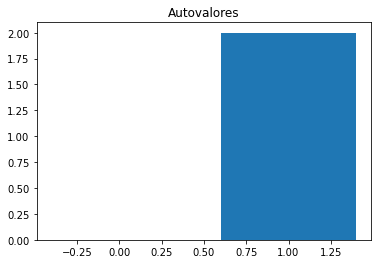

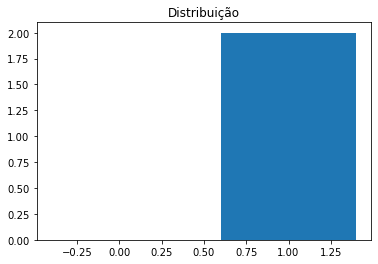

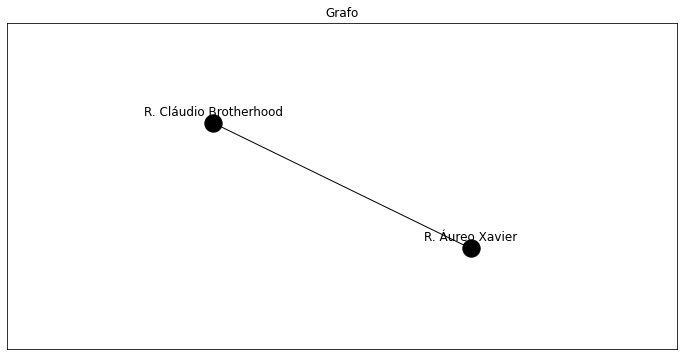

In [45]:
plotIndicadoresGrafos(G)

## Coletar dados de ruas

In [46]:
import pandas as pd
listDf = []
qtdPage = 2

for i in range(qtdPage):
  df = pd.read_html("https://cep.guiamais.com.br/busca/toto-recife-pe?page={}".format(i+1), encoding='utf8')
  listDf.append(df[0])

dfConcat = pd.concat(listDf)

dfConcat = dfConcat.query("BAIRRO =='Totó'")

dfConcat.to_excel("Bairro_Toto.xlsx")

In [47]:
len(dfConcat)

49

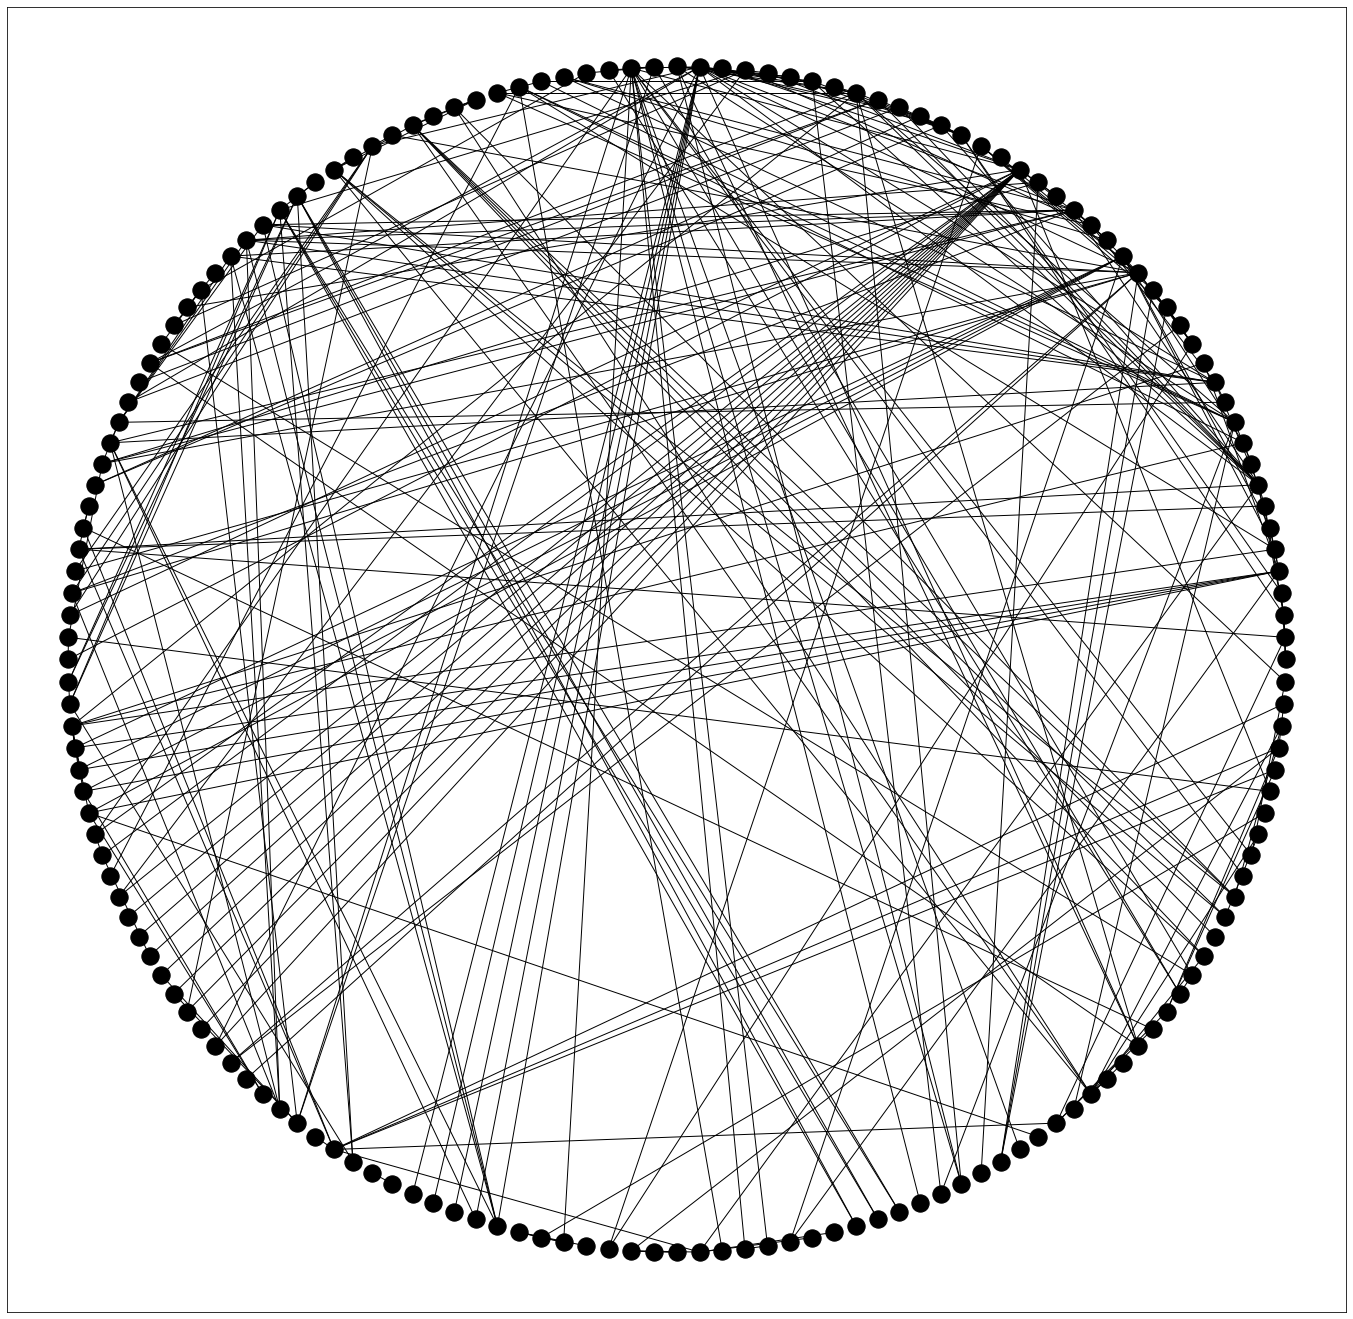

In [89]:
dfBairro = pd.read_excel("Dados\Dados Coletados\Alto Movimento\Bairro_Pina.xlsx", sheet_name="Planilha1", usecols=[0,1,2])

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

G = nx.Graph([(row['Rua 1'],row['Rua 2'])for index, row in dfBairro.iterrows()])


fig, ax = plt.subplots(1,1,figsize=(24,24))
pos = nx.circular_layout(G)
pos_nodes = nudge(pos, 0, 0.1)

#nx.draw_networkx(G,with_labels=True, pos = pos_nodes, node_size=350, node_color='Black' ,ax=ax[0])

nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax, node_color='Black')
#nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax)

#ax.margins(0.8, 0.8) 
plt.show()

In [94]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}


def plotIndicadoresGrafos(G):
    print('\n\n'+'\033[1m' + 'Indicadores' + '\033[0m')
    print('Densidade: \t\t', nx.density(G))
    print("Coef. Clusterização: \t", nx.average_clustering(G))
    print("Grau médio: \t\t", grauMedio(G))
    print("Entropia: \t\t", entropia(G))
    print("Assortatividade: \t", nx.degree_assortativity_coefficient(G))

    print('\n\033[1m' + 'Graficos' + '\033[0m')
    #Autovalores
    fig, ax = plt.subplots(1,1,figsize=(24,24))
    autovalores = nx.laplacian_spectrum(G)
    plt.bar(np.arange(G.order()), autovalores)
    plt.title("Autovalores")
    plt.show()

    #Disrtibuição
    fig, ax = plt.subplots(1,1,figsize=(24,24))
    freq = nx.degree_histogram(G)
    plt.title("Distribuição")
    plt.bar(np.arange(len(freq)), freq)
    plt.show()

    #Grafos
    
    fig, ax = plt.subplots(1,1,figsize=(24,24))
    pos = nx.circular_layout(G)
    pos_nodes = nudge(pos, 0, 0.1)

    nx.draw_networkx(G, pos=pos, with_labels=False, ax=ax, node_color='Black')
    #nx.draw_networkx_labels(G, pos=pos_nodes, ax=ax)
    #ax.margins(0.8, 0.8)

    plt.title("Grafo")

    plt.show()



Indicadores
Densidade: 		 0.022027373823781008
Coef. Clusterização: 	 0.1376346032830995
Grau médio: 		 3.6785714285714284
Entropia: 		 -746.6255616176916
Assortatividade: 	 -0.21179201210752427

Graficos


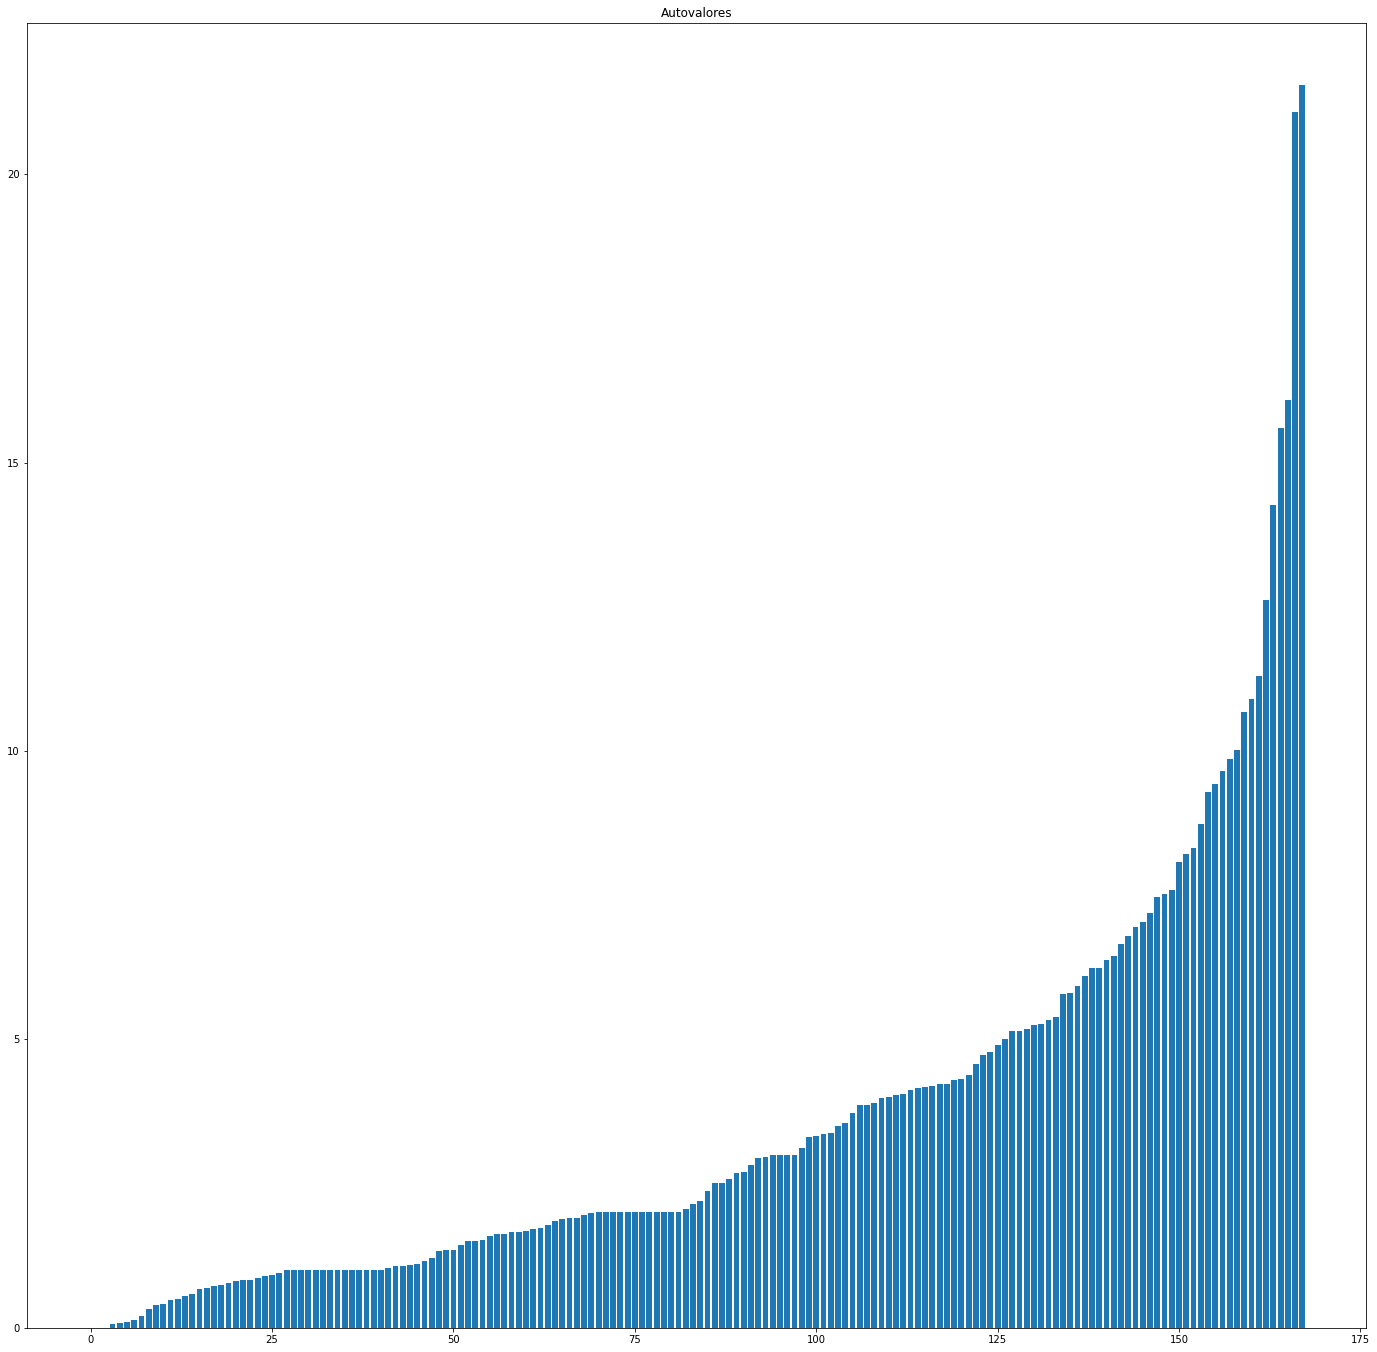

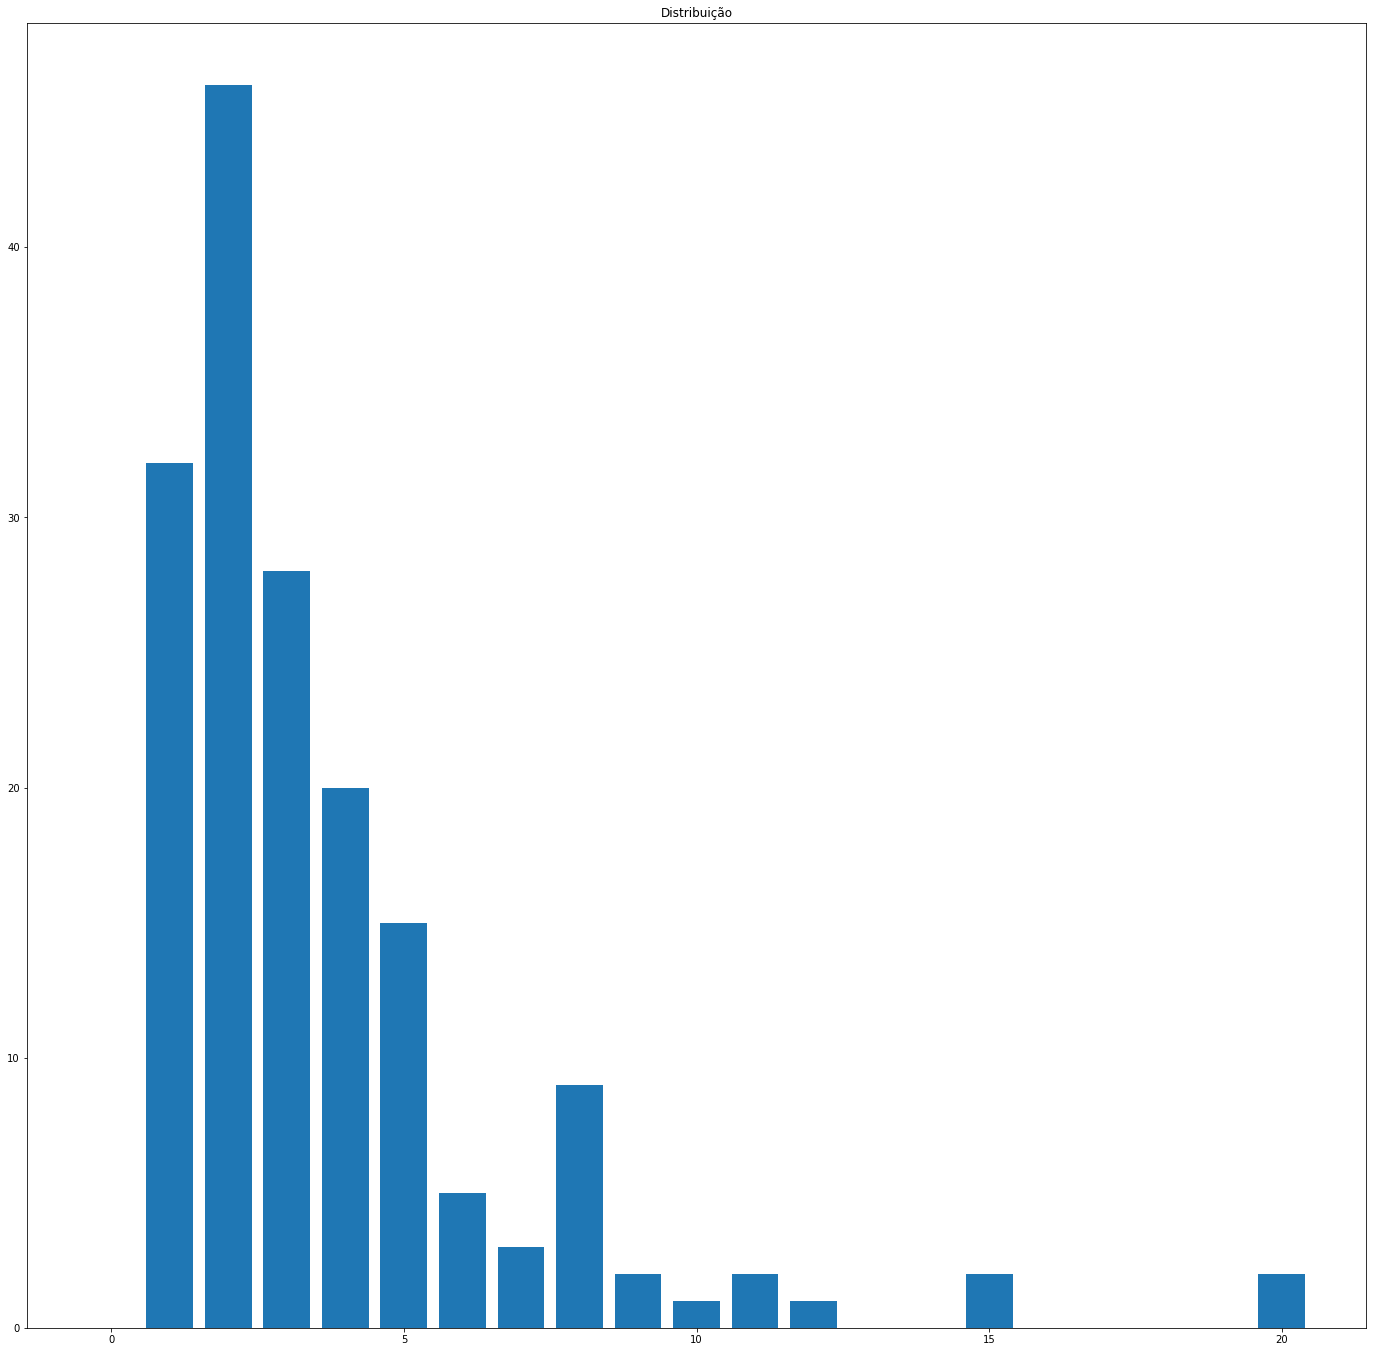

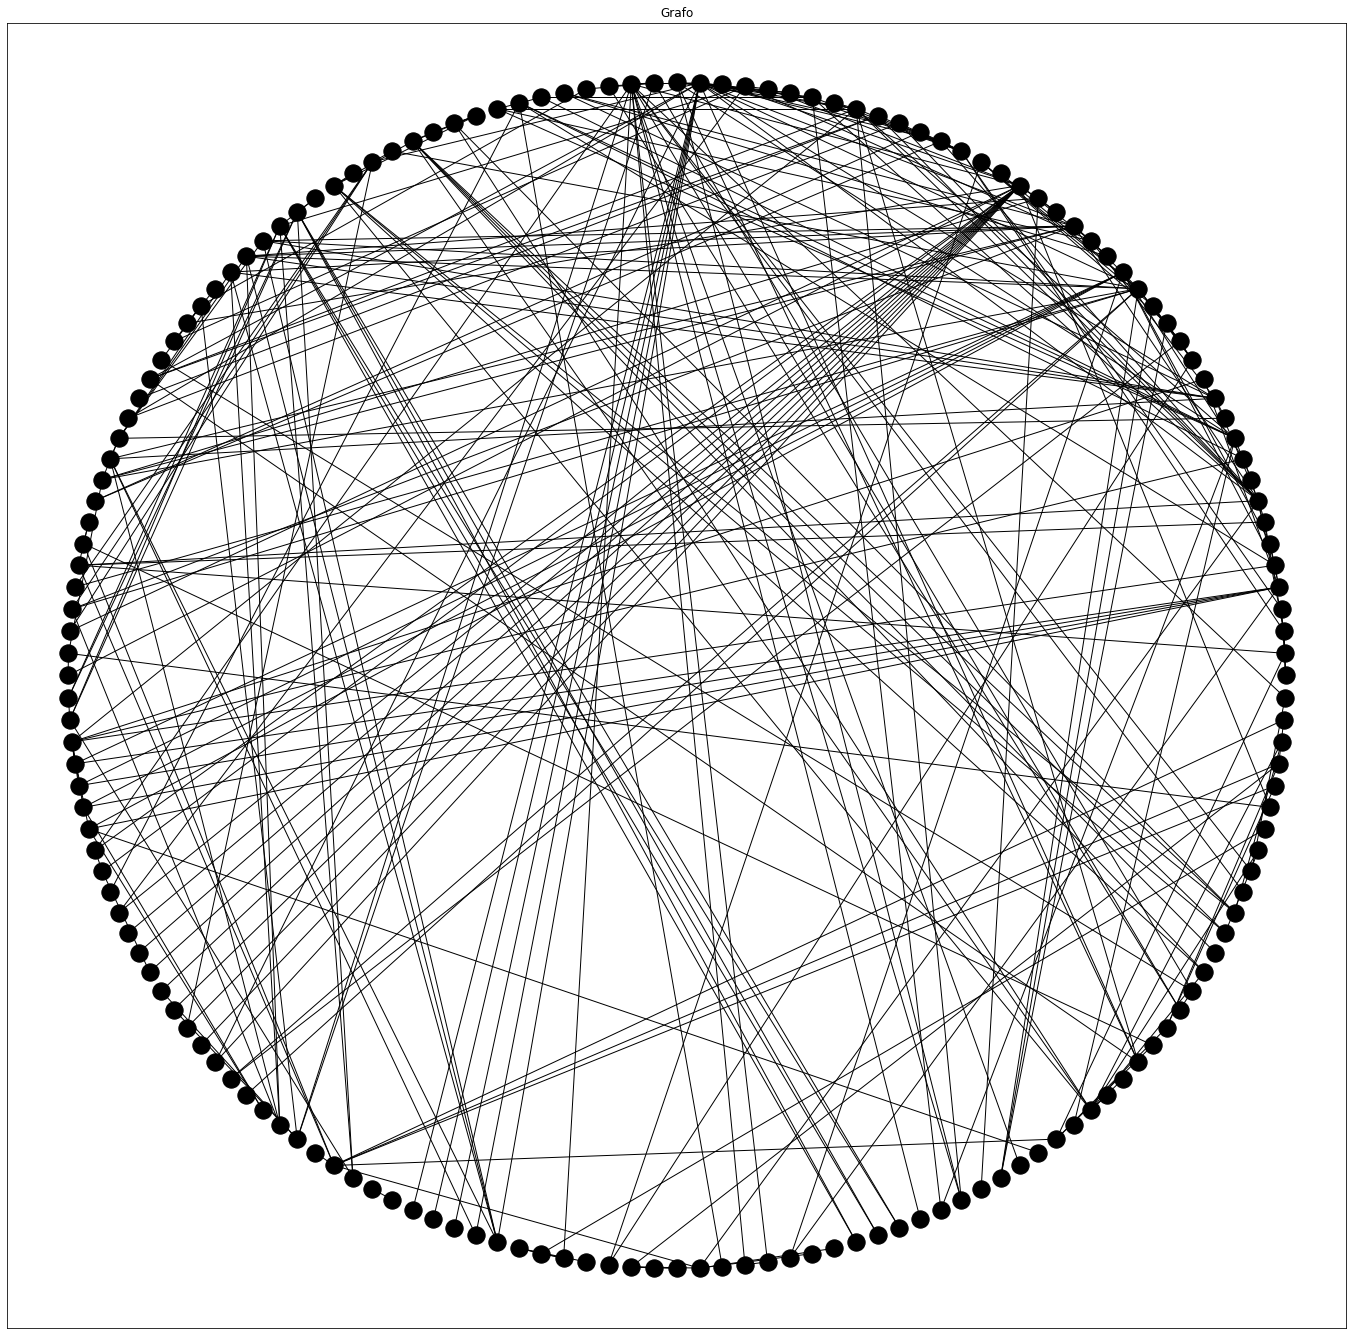

In [95]:
plotIndicadoresGrafos(G)

In [77]:
#[(row['Rua 1'],row['Rua 2'])for index, row in dfPina.iterrows()]

[('Rua Utinga', 'Travesa García'),
 ('Rua Utinga', 'Rua García'),
 ('Rua Utinga', 'Rua Onze de Agosto'),
 ('Travesa García', 'Rua Utinga'),
 ('Travesa García', 'Rua García'),
 ('Rua García', 'Travesa García'),
 ('Rua García', 'Rua Ananias Catanho'),
 ("2A Travesa Ana Carneiro D'alburquerque", 'Rua Utinga'),
 ("2A Travesa Ana Carneiro D'alburquerque", 'Rua Papanduva'),
 ('Rua Onze de Agosto', 'Rua Utinga'),
 ('Rua Onze de Agosto', 'Rua Papanduva'),
 ('Rua Onze de Agosto', 'Rua Juvêncio Marquês da Cunha'),
 ('Rua Onze de Agosto', 'Avenida Liberdade'),
 ('Rua Ananias Catanho', 'Rua García'),
 ('Rua Ananias Catanho', 'Rua Paulinho de Farias'),
 ('Rua Ananias Catanho', 'Rua Papanduva'),
 ('Rua Papanduva', 'Rua Ananias Catanho'),
 ('Rua Papanduva', 'Rua Paulinho de Farias'),
 ('Rua Papanduva', "2A Travesa Ana Carneiro D'alburquerque"),
 ('Rua Papanduva', "Rua Ana Carneiro D'Albuquerque"),
 ('Rua Papanduva', 'Rua Onze de Agosto'),
 ("Rua Ana Carneiro D'Albuquerque", 'Rua Papanduva'),
 ("Rua A